# Importing libraries, Reading the CSV, And initial look.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import re
import pickle

In [ ]:
df = pd.read_csv('ApartmentRentPrediction.csv')
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.000000e+03,8970.000000,8993.000000,9000.000000,9000.000000,8993.00000,8993.000000,9.000000e+03
mean,5.623668e+09,1.380769,1.744023,1487.286222,947.138667,37.67689,-94.778612,1.574906e+09
std,7.007402e+07,0.616171,0.942446,1088.561190,668.806214,5.51527,15.769232,3.755142e+06
min,5.508654e+09,1.000000,0.000000,200.000000,106.000000,21.31550,-158.022100,1.568744e+09
25%,5.509250e+09,1.000000,1.000000,950.000000,650.000000,33.66200,-101.858700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1275.000000,802.000000,38.75550,-93.707700,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.34980,-82.446800,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.59400,-70.191600,1.577362e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9000 non-null   int64  
 1   category       9000 non-null   object 
 2   title          9000 non-null   object 
 3   body           9000 non-null   object 
 4   amenities      5815 non-null   object 
 5   bathrooms      8970 non-null   float64
 6   bedrooms       8993 non-null   float64
 7   currency       9000 non-null   object 
 8   fee            9000 non-null   object 
 9   has_photo      9000 non-null   object 
 10  pets_allowed   5249 non-null   object 
 11  price          9000 non-null   int64  
 12  price_display  9000 non-null   object 
 13  price_type     9000 non-null   object 
 14  square_feet    9000 non-null   int64  
 15  address        6029 non-null   object 
 16  cityname       8934 non-null   object 
 17  state          8934 non-null   object 
 18  latitude

# Preprocessing

In [ ]:
def MoneyConversion(text):
    money_values = re.findall(r'\$?[\d,]+', str(text))
    converted_values = [int(value.replace('$', '').replace(',', '')) for value in money_values]
    return sum(converted_values) if converted_values else 0

df['price_display'] = df['price_display'].apply(MoneyConversion)

# print(df.isnull().sum() * 100 / len(df))
# print(df['price_display']);

In [ ]:
def fet_encod(x,y):
    average_values = x.groupby(y)['price_display'].median()
    sorted_average_values = average_values.sort_values()
    with open(f'{y}_Reg.pkl', 'wb') as model_file:
      pickle.dump(sorted_average_values, model_file)
    x[y] = x[y].map(sorted_average_values.rank())

fet_encod(df,"cityname")
fet_encod(df,'state')
fet_encod(df,"address")

In [ ]:
df.dropna(subset=['longitude','latitude', 'state','cityname','bedrooms','bathrooms'], inplace=True)

pets_allowed_mvalue = df['pets_allowed'].mode()[0]

df['pets_allowed'].fillna(pets_allowed_mvalue, inplace=True)

df['address'] = df.apply(lambda row: row['cityname'] if pd.isnull(row['address']) else row['address'], axis=1)
df.loc[0, :]

df.drop('price', inplace = True, axis = 1)




print(df.isnull().sum())

id                  0
category            0
title               0
body                0
amenities        3114
bathrooms           0
bedrooms            0
currency            0
fee                 0
has_photo           0
pets_allowed        0
price_display       0
price_type          0
square_feet         0
address             0
cityname            0
state               0
latitude            0
longitude           0
source              0
time                0
dtype: int64


In [ ]:
# Input string containing substrings separated by commas
input_string = df['amenities']
substring_set = dict()
for value in input_string:
  if type(value) != str:
    continue
  substrings = value.split(',')
  for j in substrings:
    substring_set[j] = [0, 0]

substring_set

{'Clubhouse': [0, 0],
 'Fireplace': [0, 0],
 'Gym': [0, 0],
 'Patio/Deck': [0, 0],
 'Playground': [0, 0],
 'Pool': [0, 0],
 'Cable or Satellite': [0, 0],
 'Dishwasher': [0, 0],
 'Elevator': [0, 0],
 'Garbage Disposal': [0, 0],
 'Internet Access': [0, 0],
 'Parking': [0, 0],
 'Refrigerator': [0, 0],
 'Storage': [0, 0],
 'Basketball': [0, 0],
 'Tennis': [0, 0],
 'Wood Floors': [0, 0],
 'Gated': [0, 0],
 'TV': [0, 0],
 'AC': [0, 0],
 'Doorman': [0, 0],
 'View': [0, 0],
 'Washer Dryer': [0, 0],
 'Luxury': [0, 0],
 'Hot Tub': [0, 0],
 'Alarm': [0, 0],
 'Golf': [0, 0]}

In [ ]:
for i in range(df.shape[0]):
  # print(df.iloc[i, 4], i)
  if type(df.iloc[i, 4]) != str:
    continue
  s = df.iloc[i, 4].split(',')
  for j in s:
    substring_set[j][0] += df.iloc[i, 11]
    substring_set[j][1] += 1

l = []

for key, value in substring_set.items():
  l.append((value[0]/value[1], key))

l.sort()
for i in range(len(l)):
  substring_set[l[i][1]] = i

for i in range(df.shape[0]):
  if type(df.iloc[i, 4]) != str:
    df.iloc[i, 4] = 0
    continue
  s = df.iloc[i, 4].split(',')
  tmp = 0
  for j in s:
    tmp += (1 << (substring_set[j]))
  df.iloc[i, 4] = tmp

print(df.isnull().sum())

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


In [ ]:
# Apply ceil function


df['bathrooms'] = df['bathrooms'].apply(np.ceil)

In [ ]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Detect columns with outliers
columns_with_outliers = []
for column in numeric_columns:
    z_scores = stats.zscore(df[column], nan_policy = 'omit')
    if (z_scores < -3).any():
      columns_with_outliers.append(column)
    elif (z_scores > 3).any():
      columns_with_outliers.append(column)

if columns_with_outliers:
    print("Columns with outliers:", columns_with_outliers)
else:
    print("No columns with outliers detected.")


Columns with outliers: ['bathrooms', 'bedrooms', 'price_display', 'square_feet', 'latitude', 'longitude']


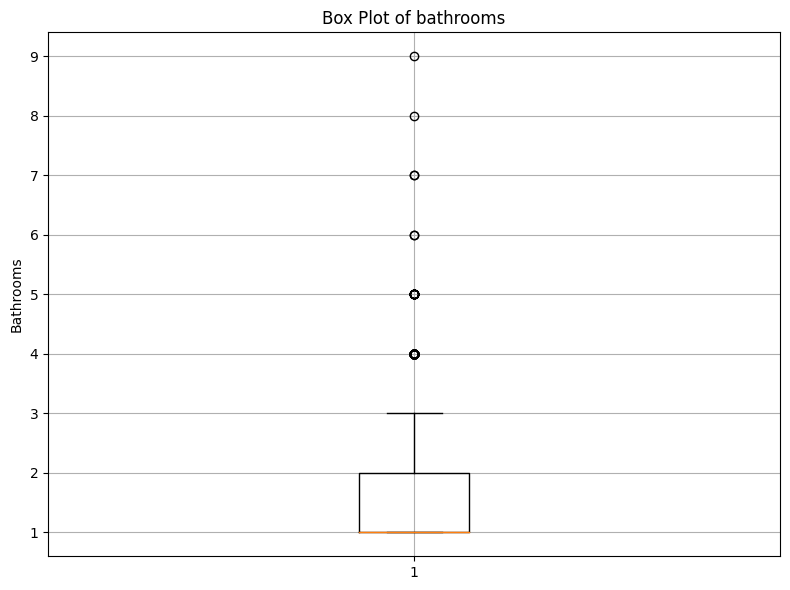

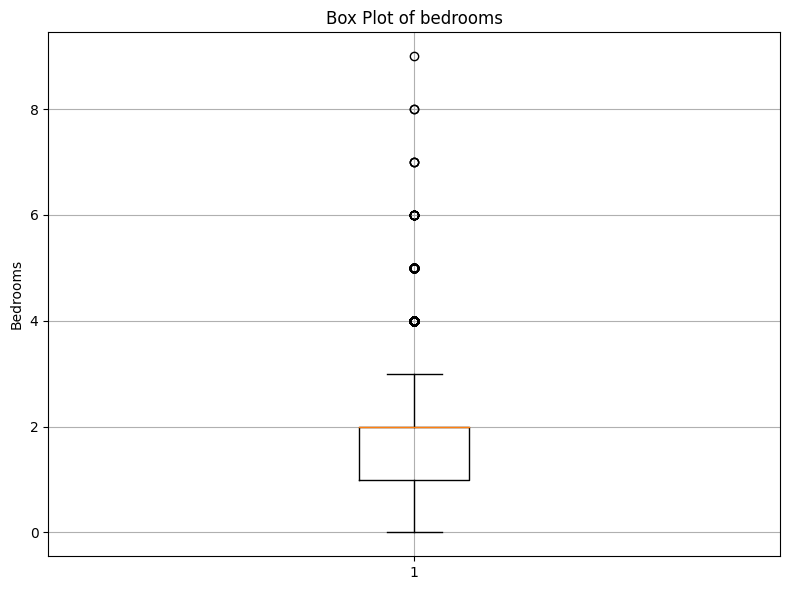

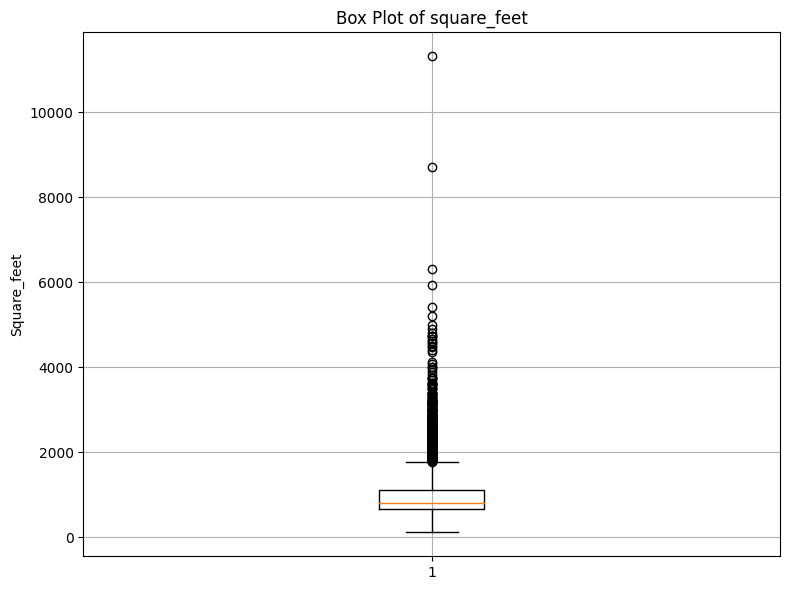

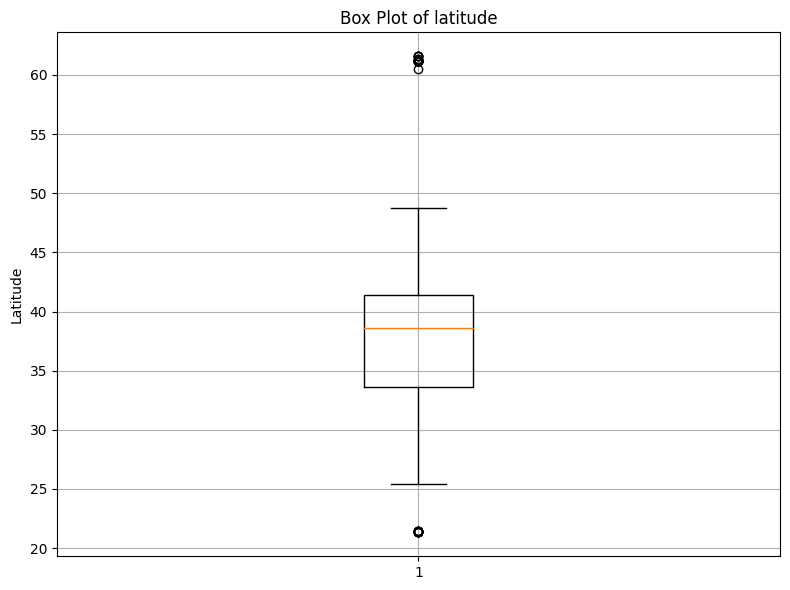

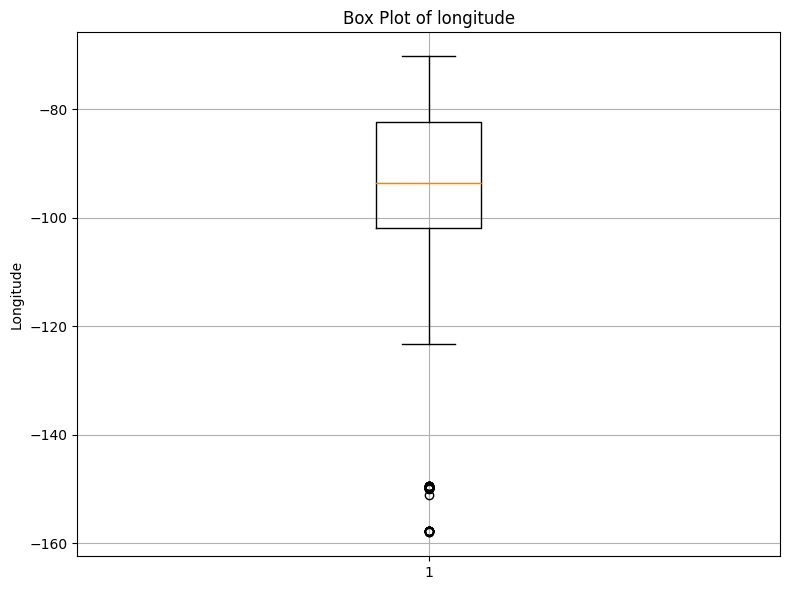

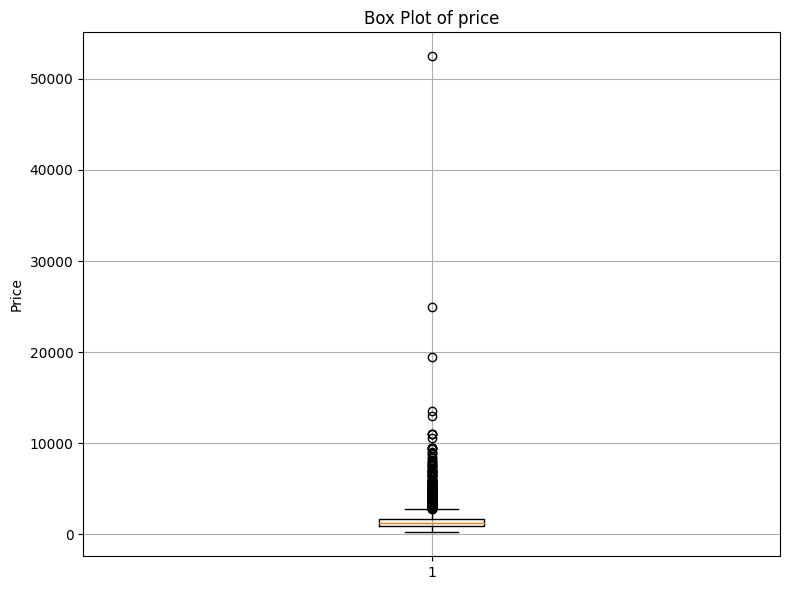

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['bathrooms'])
plt.title('Box Plot of bathrooms')
plt.ylabel('Bathrooms')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['bedrooms'])
plt.title('Box Plot of bedrooms')
plt.ylabel('Bedrooms')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['square_feet'])
plt.title('Box Plot of square_feet')
plt.ylabel('Square_feet')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['latitude'])
plt.title('Box Plot of latitude')
plt.ylabel('Latitude')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['longitude'])
plt.title('Box Plot of longitude')
plt.ylabel('Longitude')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['price_display'])
plt.title('Box Plot of price')
plt.ylabel('Price')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Calculate z-scores for each value in the DataFrame
Z = stats.zscore(df.select_dtypes(include=['int64', 'float64']), nan_policy = 'omit')

#Drop outliers with z-score equal to or greater than 3
df.drop(df.index[(np.abs(Z) > 3).any(axis=1)], inplace=True)



cityname_mode = df['cityname'].mode()[0]
state_mode = df['state'].mode()[0]
square_feet_mean = df['square_feet'].mean()

with open('fillna_Reg.pkl', 'wb') as model_file:
    pickle.dump({'cityname': cityname_mode, 'state':state_mode, 'square_feet': square_feet_mean}, model_file)

print(df.isnull().sum())

id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64


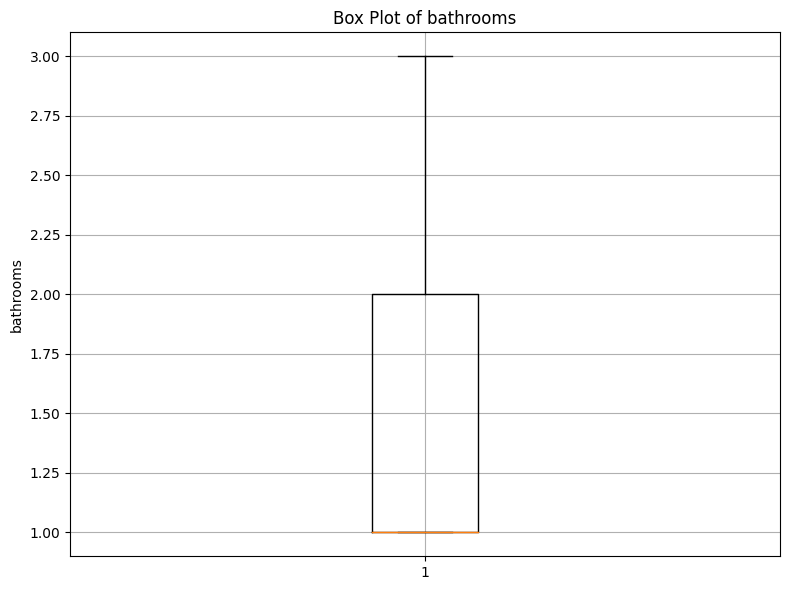

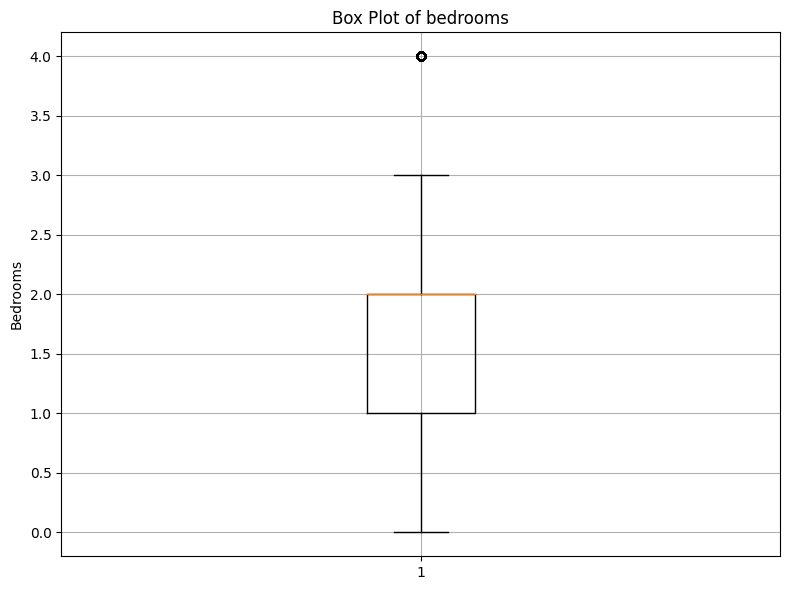

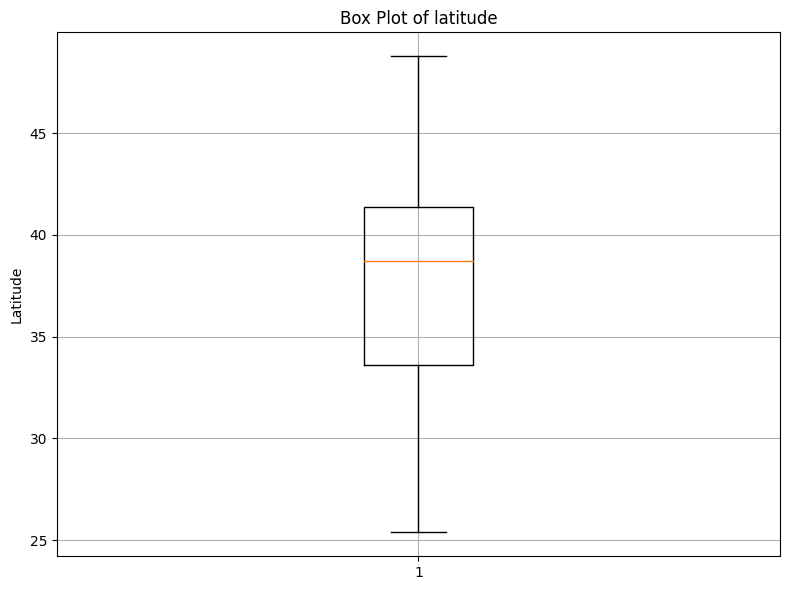

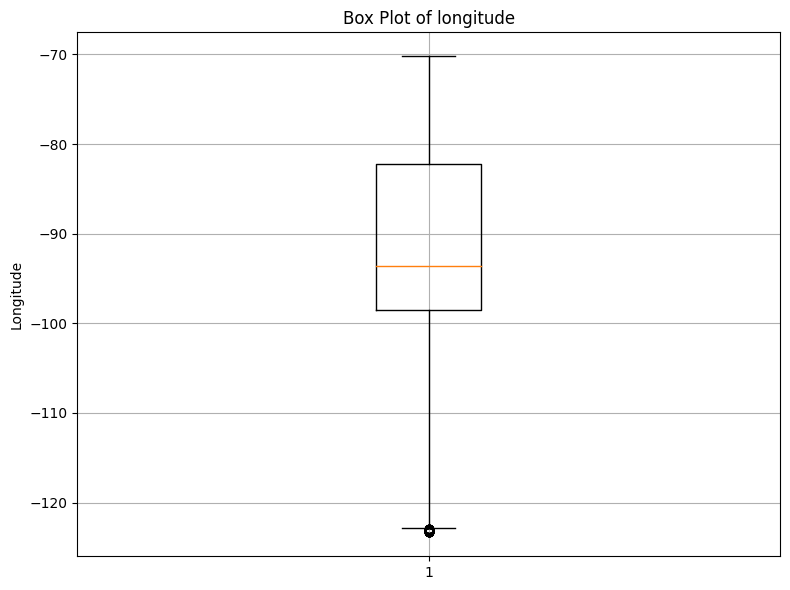

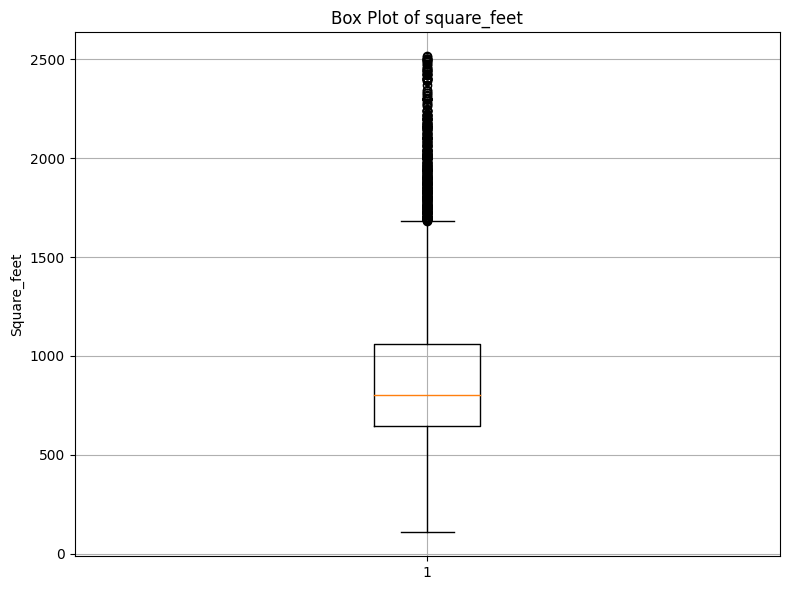

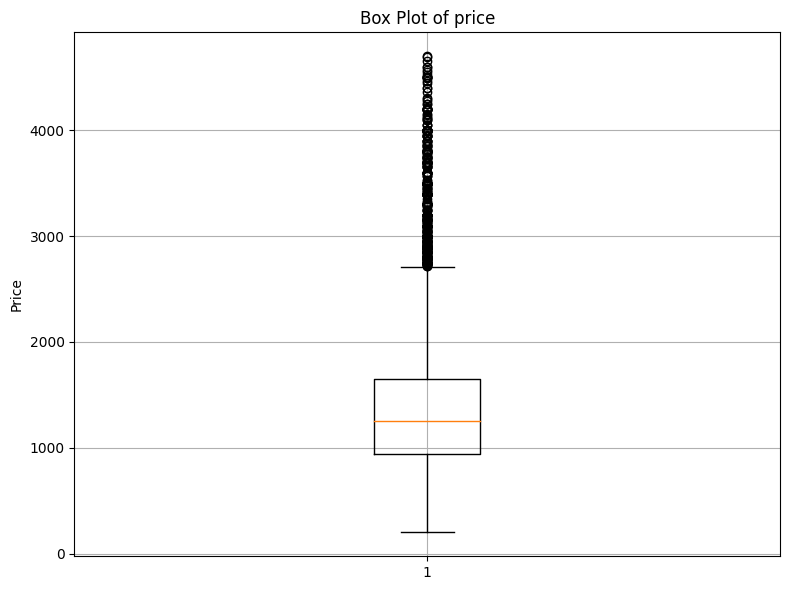

In [ ]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.boxplot(df['bathrooms'])
plt.title('Box Plot of bathrooms')
plt.ylabel('bathrooms')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['bedrooms'])
plt.title('Box Plot of bedrooms')
plt.ylabel('Bedrooms')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['latitude'])
plt.title('Box Plot of latitude')
plt.ylabel('Latitude')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['longitude'])
plt.title('Box Plot of longitude')
plt.ylabel('Longitude')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['square_feet'])
plt.title('Box Plot of square_feet')
plt.ylabel('Square_feet')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['price_display'])
plt.title('Box Plot of price')
plt.ylabel('Price')
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

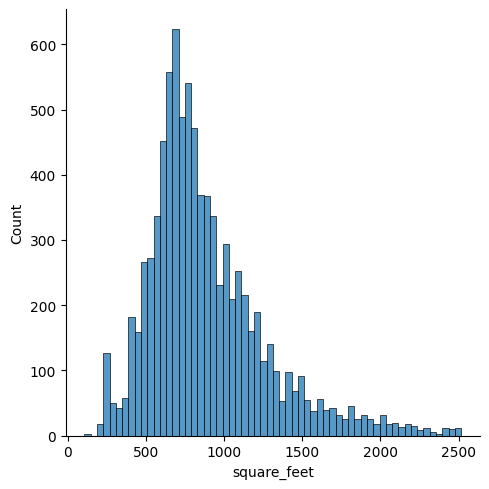

In [ ]:
sns.displot(df['square_feet'])

In [ ]:
# Encode categorical columns
cat_cols = ['category', 'title', 'body', 'currency', 'fee','has_photo', 'pets_allowed', 'price_type', 'source']
def Feature_Encoder(df,cat_cols):
    for c in cat_cols:
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(list(df[c].values))
    return df

In [ ]:
# Min-Max Scaling on address
df['address'] = (df['address'] - df['address'].min()) / (df['address'].max() - df['address'].min())

In [ ]:
#Encoding ID column
tmp = df.copy()
df['id'] = range(1, len(df) + 1)
Feature_Encoder(df,cat_cols)
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,1,0,6453,324,532897,3.0,2.0,0,0,1,...,1194,0,800,0.101384,601.5,23.0,35.7585,-78.7783,7,1568755960
1,2,0,3686,6686,2105162,1.0,1.0,0,0,1,...,1370,0,795,0.597586,864.5,26.0,43.0724,-89.4003,8,1577015508
2,3,0,2775,4768,4956,1.0,1.0,0,0,1,...,1009,0,560,0.341803,673.0,37.0,29.6533,-82.3656,8,1577358921
3,4,0,3498,6282,0,1.0,1.0,0,0,1,...,695,0,600,0.074793,259.5,6.5,41.2562,-96.0404,8,1577359849
4,5,0,5917,4291,0,3.0,3.0,0,0,1,...,3695,0,1600,0.982019,1393.5,49.0,34.0372,-118.2972,8,1577360159


In [ ]:
df.drop(columns=['address','category', 'title', 'body', 'currency', 'fee','has_photo', 'pets_allowed', 'price_type', 'source', 'latitude', 'longitude', 'id', 'time'], inplace = True)

print(df.head())

  amenities  bathrooms  bedrooms  price_display  square_feet  cityname  state
0    532897        3.0       2.0           1194          800     601.5   23.0
1   2105162        1.0       1.0           1370          795     864.5   26.0
2      4956        1.0       1.0           1009          560     673.0   37.0
3         0        1.0       1.0            695          600     259.5    6.5
4         0        3.0       3.0           3695         1600    1393.5   49.0


# Visualizing

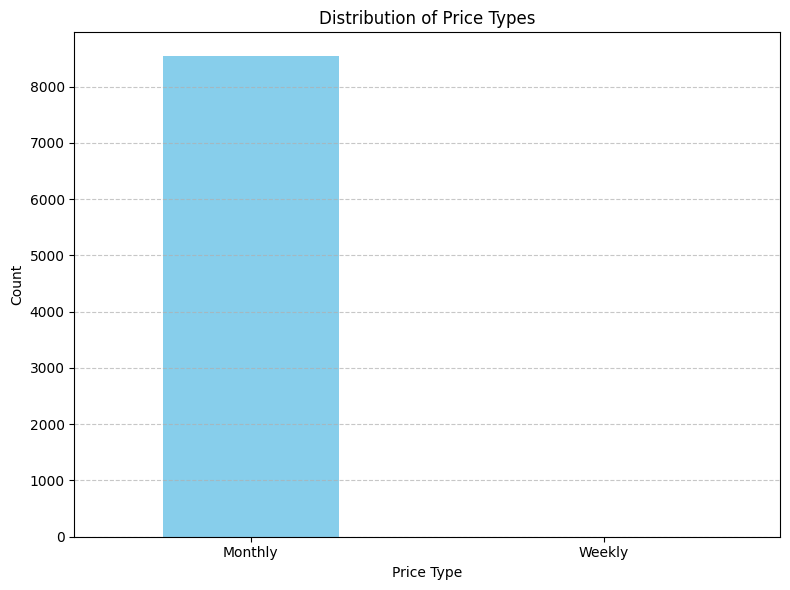

In [ ]:
price_type_counts = tmp['price_type'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
price_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Types')
plt.xlabel('Price Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

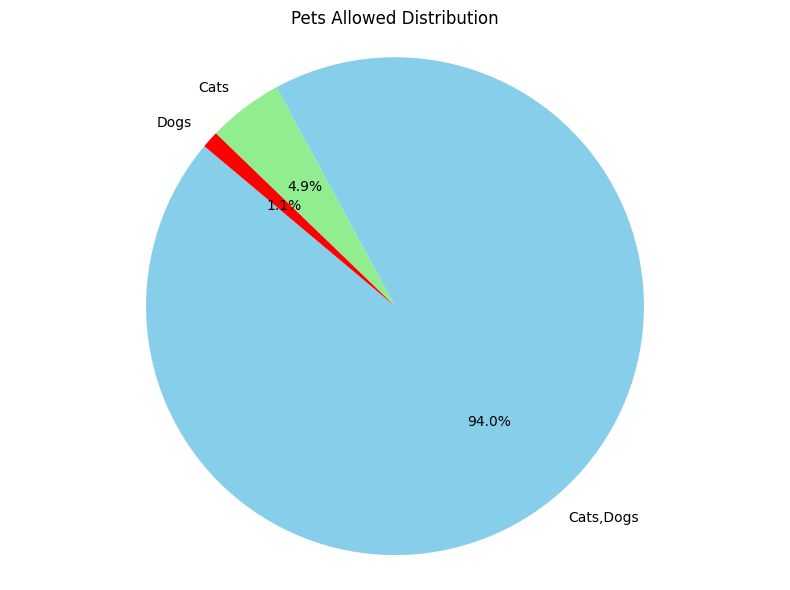

In [ ]:
pets_allowed_counts = tmp['pets_allowed'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(pets_allowed_counts, labels=pets_allowed_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'red', 'green'])
plt.title('Pets Allowed Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

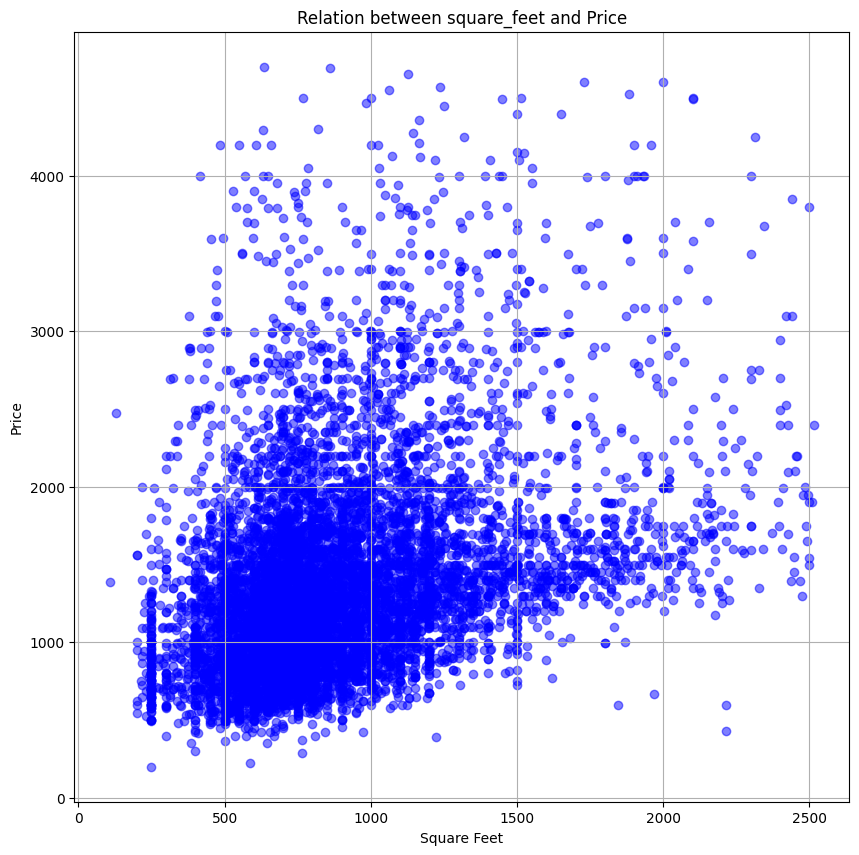

In [ ]:
# Extracting data for scatter plot
x = tmp['square_feet']
y = tmp['price_display']

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='blue', alpha=0.5)  # Create the scatter plot
plt.title('Relation between square_feet and Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

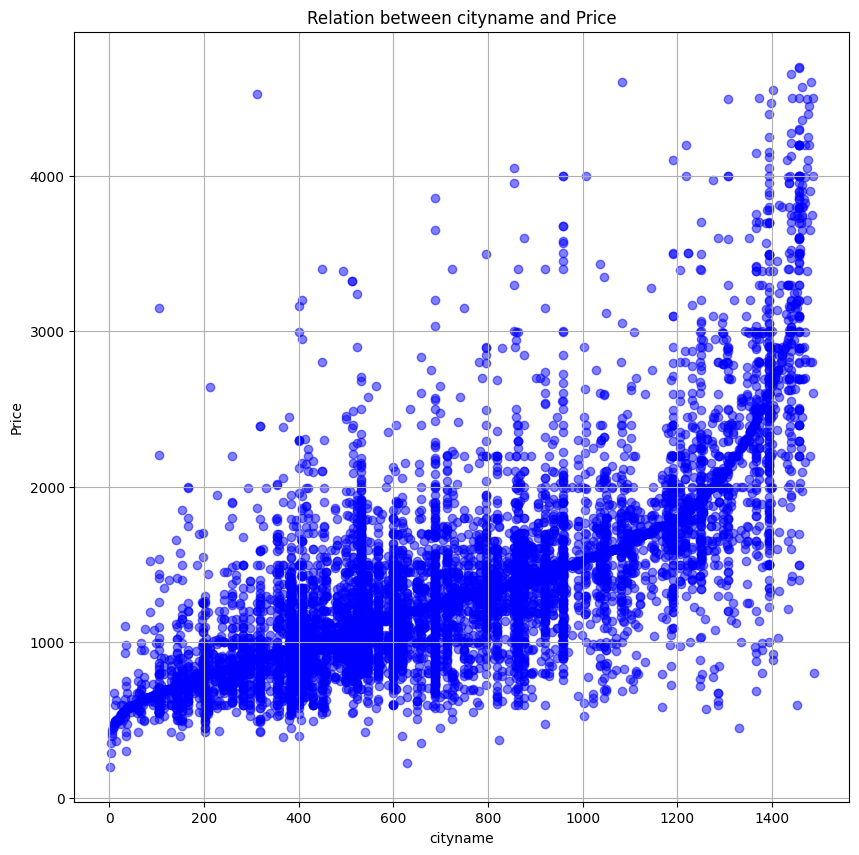

In [ ]:
# Extracting data for scatter plot
x = tmp['cityname']
y = tmp['price_display']

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='blue', alpha=0.5)  # Create the scatter plot
plt.title('Relation between cityname and Price')
plt.xlabel('cityname')
plt.ylabel('Price')
plt.grid(True)
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

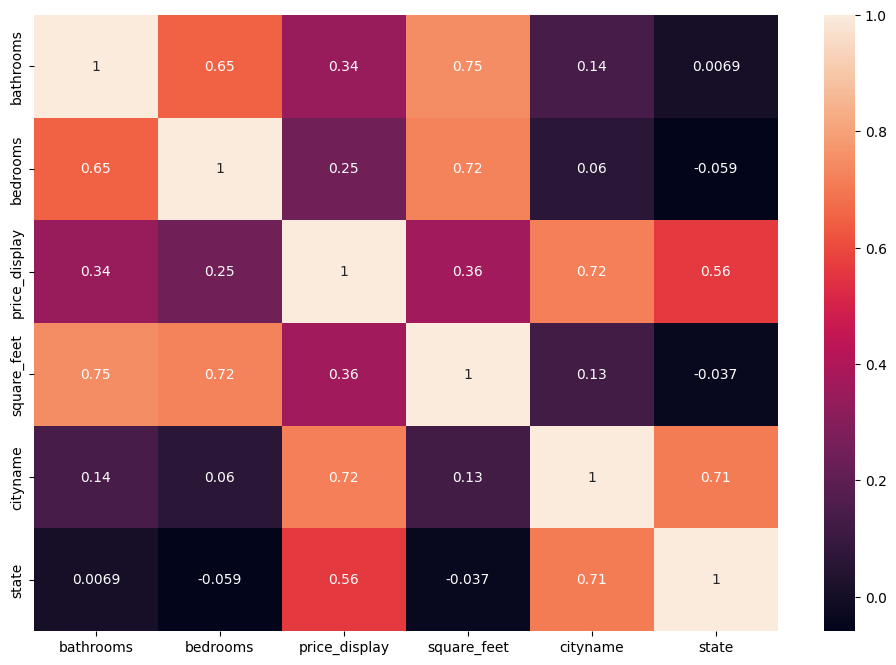

In [ ]:
Y=df['price_display']
df_info = df.iloc[:, :]
corr = df_info.corr()
top_feature = corr.index[abs(corr['price_display'])>0.15]
plt.subplots(figsize=(12, 8))
top_corr = df_info[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
# top_feature = top_feature.delete(-1)


# Feature Selection and Applying Models

In [ ]:
# Feature selection
selected_features = ['cityname', 'square_feet', 'state']
X = df[selected_features].values
Y = df['price_display'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True ,random_state=10)

with open('ds_Reg.pkl', 'wb') as model_file:
    pickle.dump({'X': X, 'Y': Y}, model_file)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(Y_train, y_pred_train)
mse_test = mean_squared_error(Y_test, y_pred_test)

print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
print("R^2 score(Train):", r2_score(Y_train, y_pred_train))
print("R^2 score(Test):", r2_score(Y_test, y_pred_test))

Train MSE: 169033.97161536565, Test MSE: 161767.09453109175
R^2 score(Train): 0.6009510269045184
R^2 score(Test): 0.6199701113359155


In [ ]:
X_train2, X_valid, Y_train2, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, shuffle=True ,random_state=10)


poly_features = PolynomialFeatures(degree=3)

X_train_poly = poly_features.fit_transform(X_train2)
# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, Y_train2)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on validation data-set
valid_prediction = poly_model.predict(poly_features.fit_transform(X_valid))

# predicting on test test
test_prediction = poly_model.predict(poly_features.fit_transform(X_test))

print('Mean Square Error(Train)', metrics.mean_squared_error(Y_train2, y_train_predicted))
print("R^2 score(train):", r2_score(Y_train2, y_train_predicted))

print('Mean Square Error(valid)', metrics.mean_squared_error(Y_valid, valid_prediction))
print("R^2 score(valid)", r2_score(Y_valid, valid_prediction))

print('Mean Square Error(test)', metrics.mean_squared_error(Y_test, test_prediction))
print("R^2 score(test):", r2_score(Y_test, test_prediction))


Mean Square Error(Train) 123877.24276232268
R^2 score(train): 0.7051407117062438
Mean Square Error(valid) 126526.03325546089
R^2 score(valid) 0.7084562446479874
Mean Square Error(test) 121983.77514044323
R^2 score(test): 0.7134307158089099


In [ ]:
X_train3, X_valid, Y_train3, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, shuffle=True ,random_state=10)



# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=10, min_samples_leaf=4, random_state=16)

# Train the model
rf_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_train = rf_model.predict(X_train)
y_pred_valid = rf_model.predict(X_valid)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print('Mean Squared Error(train):', mean_squared_error(Y_train, y_pred_train))
print("R^2 score(train):", r2_score(Y_train, y_pred_train))

print('Mean Squared Error(valid):', mean_squared_error(Y_valid, y_pred_valid))
print("R^2 score(valid):", r2_score(Y_valid, y_pred_valid))

print('Mean Squared Error(test):', mean_squared_error(Y_test, y_pred_test))
print("R^2 score(test):", r2_score(Y_test, y_pred_test))

with open('RF_Reg.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

Mean Squared Error(train): 82509.75221142381
R^2 score(train): 0.8052141142062694
Mean Squared Error(valid): 85709.65088626502
R^2 score(valid): 0.8025061495539049
Mean Squared Error(test): 98594.46776529797
R^2 score(test): 0.7683778353295496
